In [123]:
import pandas as pd
import numpy as np
from torch.distributions.constraints import positive

In [124]:
data = pd.read_csv("sp500_returns_with_tickers.csv", index_col="date")
data.head()

,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,-0.191095,0.003644,-0.016467,-0.050830,-0.018772,-0.037781,0.016097,-0.119032,0.088106,-0.023736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,-0.032110,-0.059550,-0.039574,-0.029007,-0.021200,0.025731,0.061041,-0.033588,-0.031555,0.034976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,-0.042654,-0.036294,-0.039348,0.321333,0.091389,-0.028995,-0.020016,-0.026856,-0.004568,-0.019201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-29,-0.103960,-0.073718,0.046752,-0.031884,0.182962,-0.070899,-0.038968,0.064935,0.048989,-0.064213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-31,0.052486,0.107266,0.022925,0.039222,-0.010638,0.081385,0.018911,0.071646,0.026602,0.048951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
cap_data = pd.read_csv("sp500_market_caps.csv", index_col="date")
cap_data.tail()

,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,NaN,3.893754e+08,3.100618e+09,NaN,NaN,23604291.92,1.350731e+08,NaN,NaN,NaN,...,NaN,7.604632e+08,3.885612e+07,18246347.55,58676092.68,NaN,9415749.09,NaN,2.149182e+07,6.840044e+08
2024-09-30,NaN,4.721891e+08,3.199038e+09,NaN,NaN,24198036.99,1.344126e+08,NaN,NaN,NaN,...,NaN,8.056744e+08,3.788874e+07,18598211.55,59380035.00,NaN,9557108.64,NaN,2.143637e+07,8.390474e+08
2024-10-31,NaN,4.650952e+08,3.021164e+09,NaN,NaN,24406387.74,1.337428e+08,NaN,NaN,NaN,...,NaN,7.929237e+08,3.879349e+07,17601996.60,60229962.00,NaN,9958329.15,NaN,2.234668e+07,8.020335e+08
2024-11-29,NaN,5.122033e+08,3.148375e+09,NaN,NaN,27512170.56,1.514620e+08,NaN,NaN,NaN,...,NaN,7.595069e+08,4.154569e+07,16992832.05,72851357.65,NaN,11197335.40,NaN,2.259647e+07,1.107984e+09
2024-12-31,NaN,4.660847e+08,3.133802e+09,NaN,NaN,25123961.31,1.468843e+08,NaN,NaN,NaN,...,NaN,1.086402e+09,3.889374e+07,16674789.32,72414479.44,NaN,9225009.85,NaN,2.045564e+07,1.296351e+09


In [126]:
cap_data = cap_data * 1000
cap_data.tail()

,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,NaN,3.893754e+11,3.100618e+12,NaN,NaN,2.360429e+10,1.350731e+11,NaN,NaN,NaN,...,NaN,7.604632e+11,3.885612e+10,1.824635e+10,5.867609e+10,NaN,9.415749e+09,NaN,2.149182e+10,6.840044e+11
2024-09-30,NaN,4.721891e+11,3.199038e+12,NaN,NaN,2.419804e+10,1.344126e+11,NaN,NaN,NaN,...,NaN,8.056744e+11,3.788874e+10,1.859821e+10,5.938004e+10,NaN,9.557109e+09,NaN,2.143637e+10,8.390474e+11
2024-10-31,NaN,4.650952e+11,3.021164e+12,NaN,NaN,2.440639e+10,1.337428e+11,NaN,NaN,NaN,...,NaN,7.929237e+11,3.879349e+10,1.760200e+10,6.022996e+10,NaN,9.958329e+09,NaN,2.234668e+10,8.020335e+11
2024-11-29,NaN,5.122033e+11,3.148375e+12,NaN,NaN,2.751217e+10,1.514620e+11,NaN,NaN,NaN,...,NaN,7.595069e+11,4.154569e+10,1.699283e+10,7.285136e+10,NaN,1.119734e+10,NaN,2.259647e+10,1.107984e+12
2024-12-31,NaN,4.660847e+11,3.133802e+12,NaN,NaN,2.512396e+10,1.468843e+11,NaN,NaN,NaN,...,NaN,1.086402e+12,3.889374e+10,1.667479e+10,7.241448e+10,NaN,9.225010e+09,NaN,2.045564e+10,1.296351e+12


In [127]:
cap_data_numeric = cap_data.apply(pd.to_numeric, errors='coerce')
cap_data_numeric = cap_data_numeric.fillna(0)
weight_data = cap_data_numeric.div(cap_data_numeric.sum(axis=1), axis=0)
row_sums = weight_data.sum(axis=1)
print(row_sums.head())
weight_data.tail()

date
2005-01-31    1.0
2005-02-28    1.0
2005-03-31    1.0
2005-04-29    1.0
2005-05-31    1.0
dtype: float64


,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,0.0,0.007886,0.062798,0.0,0.0,0.000478,0.002736,0.0,0.0,0.0,...,0.0,0.015402,0.000787,0.000370,0.001188,0.0,0.000191,0.0,0.000435,0.013853
2024-09-30,0.0,0.009342,0.063290,0.0,0.0,0.000479,0.002659,0.0,0.0,0.0,...,0.0,0.015940,0.000750,0.000368,0.001175,0.0,0.000189,0.0,0.000424,0.016600
2024-10-31,0.0,0.009296,0.060384,0.0,0.0,0.000488,0.002673,0.0,0.0,0.0,...,0.0,0.015848,0.000775,0.000352,0.001204,0.0,0.000199,0.0,0.000447,0.016030
2024-11-29,0.0,0.009664,0.059402,0.0,0.0,0.000519,0.002858,0.0,0.0,0.0,...,0.0,0.014330,0.000784,0.000321,0.001375,0.0,0.000211,0.0,0.000426,0.020905
2024-12-31,0.0,0.008986,0.060421,0.0,0.0,0.000484,0.002832,0.0,0.0,0.0,...,0.0,0.020946,0.000750,0.000321,0.001396,0.0,0.000178,0.0,0.000394,0.024994


In [128]:
# (1) Make sure the columns match and are aligned:
data = data[weight_data.columns]

data_numeric = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Now compute returns:
sp500_returns = (data_numeric * weight_data).sum(axis=1)

sp500_returns

date
2005-01-31   -0.020418
2005-02-28    0.025947
2005-03-31   -0.014247
2005-04-29   -0.015218
2005-05-31    0.034786
                ...   
2024-08-30    0.028116
2024-09-30    0.025856
2024-10-31   -0.004786
2024-11-29    0.066461
2024-12-31   -0.015149
Length: 240, dtype: float64

In [129]:
active_mask = cap_data_numeric > 0

# Number of active stocks per month:
n_active_stocks = active_mask.sum(axis=1)

# Equal weight data:
equal_weight_data = active_mask.div(n_active_stocks, axis=0)

# Equal-weighted SP500 returns:
sp500_ew_returns = (data_numeric * equal_weight_data).sum(axis=1)

# Optional: Check
print(sp500_ew_returns.head())

date
2005-01-31   -0.029473
2005-02-28    0.020327
2005-03-31   -0.012797
2005-04-29   -0.030961
2005-05-31    0.048563
dtype: float64


In [130]:
innovation_returns = sp500_returns - sp500_ew_returns
innovation_weights = weight_data - equal_weight_data
innovation_weights.tail()



,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,0.0,0.005898,0.060810,0.0,0.0,-0.001510,0.000748,0.0,0.0,0.0,...,0.0,0.013414,-0.001201,-0.001619,-0.000800,0.0,-0.001797,0.0,-0.001553,0.011865
2024-09-30,0.0,0.007358,0.061306,0.0,0.0,-0.001505,0.000675,0.0,0.0,0.0,...,0.0,0.013956,-0.001235,-0.001616,-0.000809,0.0,-0.001795,0.0,-0.001560,0.014616
2024-10-31,0.0,0.007308,0.058396,0.0,0.0,-0.001500,0.000685,0.0,0.0,0.0,...,0.0,0.013860,-0.001213,-0.001636,-0.000784,0.0,-0.001789,0.0,-0.001541,0.014042
2024-11-29,0.0,0.007676,0.057414,0.0,0.0,-0.001469,0.000870,0.0,0.0,0.0,...,0.0,0.012342,-0.001204,-0.001667,-0.000614,0.0,-0.001777,0.0,-0.001562,0.018917
2024-12-31,0.0,0.006998,0.058433,0.0,0.0,-0.001504,0.000844,0.0,0.0,0.0,...,0.0,0.018958,-0.001238,-0.001667,-0.000592,0.0,-0.001810,0.0,-0.001594,0.023006


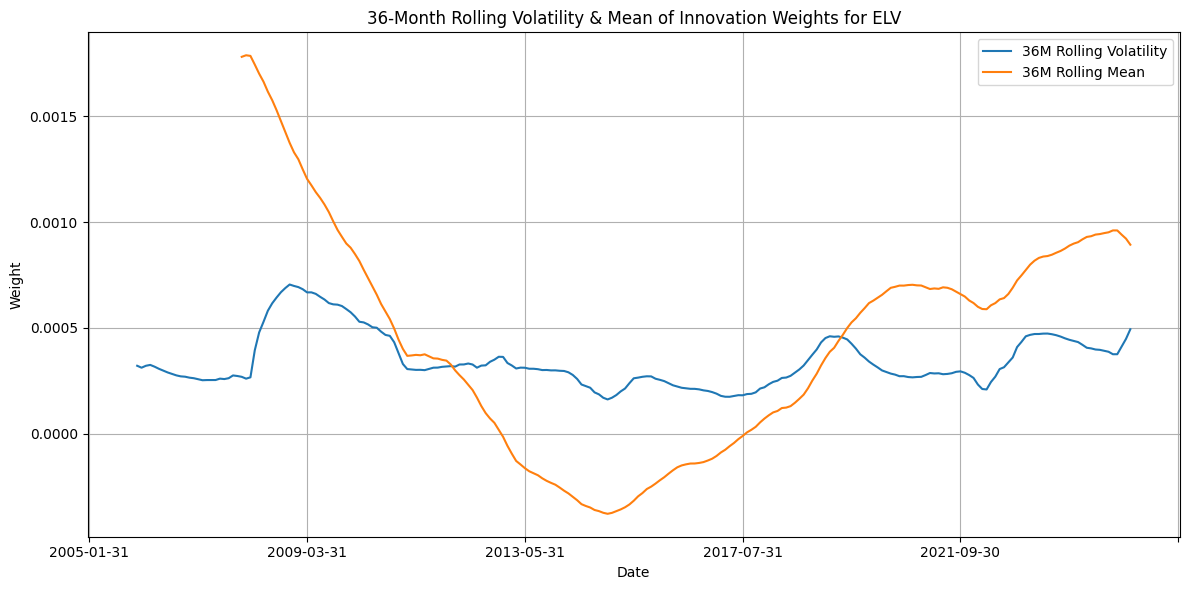

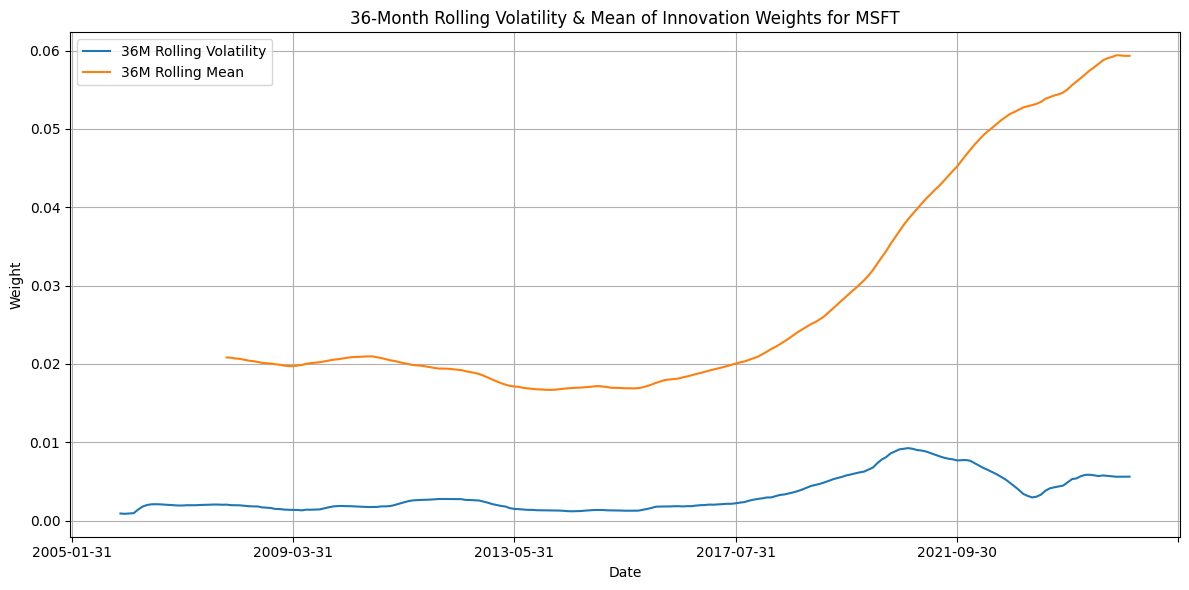

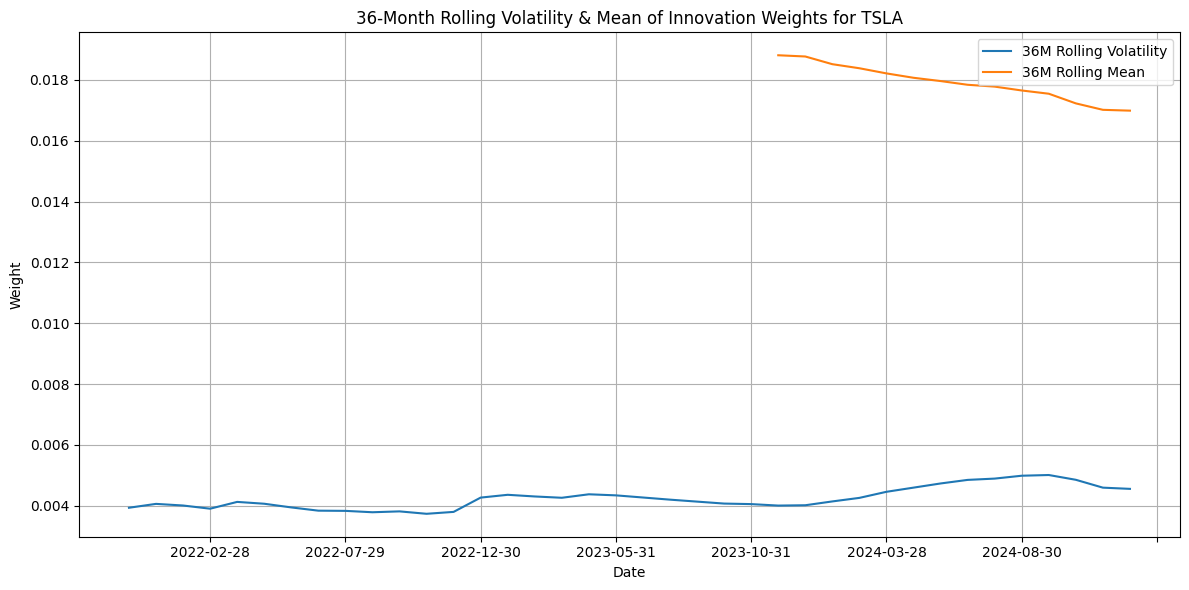

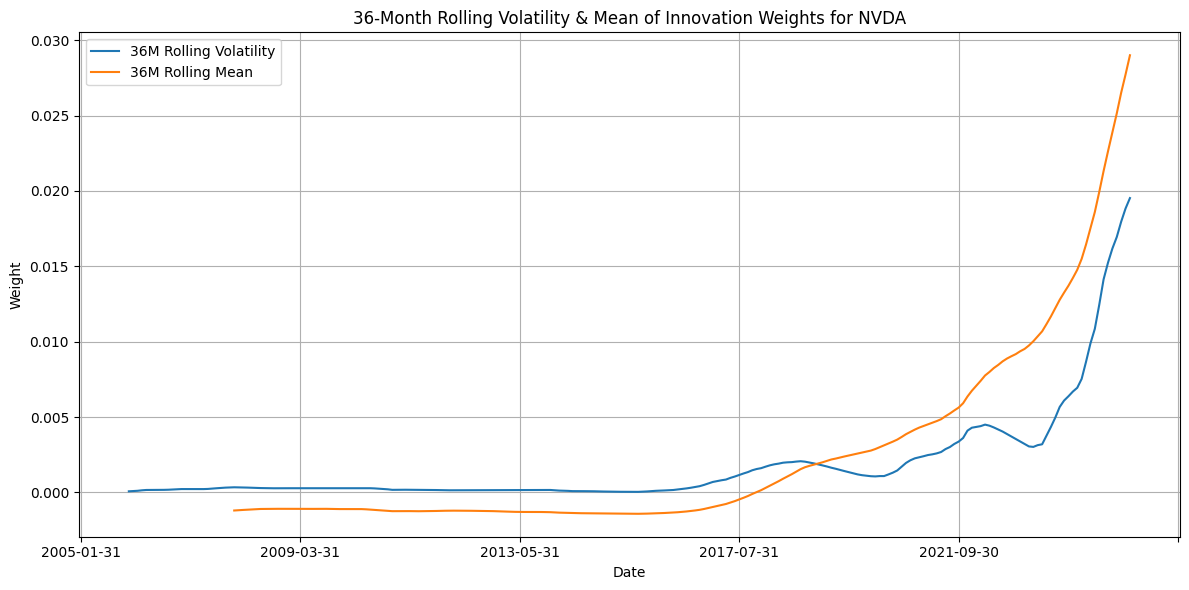

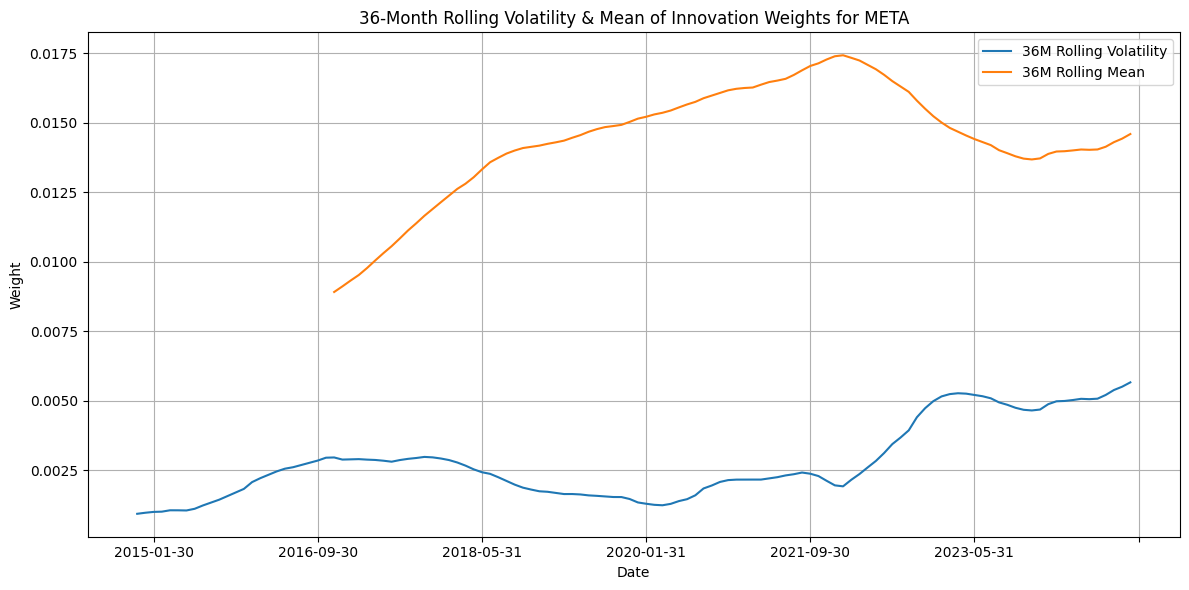

In [131]:
import matplotlib.pyplot as plt

# 1️⃣ You already have innovation_weights = weight_data - equal_weight_data

# 2️⃣ Mask out periods where stock is not in index (weight_data == 0 → stock not active)
# This step ensures that weights when stock is not in index (0 cap) are not affecting the rolling std
innovation_weights_masked = innovation_weights.where(weight_data > 0)

# 3️⃣ Compute 36-month rolling std of weights
rolling_weight_vol = innovation_weights_masked.rolling(window=36, min_periods=12).std()
rolling_weight_mean = innovation_weights_masked.rolling(window=36).mean()

# 4️⃣ Plot selected stocks
sample_stocks = ["ELV", "MSFT", "TSLA", "NVDA", "META"]  # adjust to your tickers

for ticker in sample_stocks:
    fig, ax = plt.subplots(figsize=(12, 6))

    rolling_weight_vol[ticker].plot(ax=ax, label='36M Rolling Volatility')
    rolling_weight_mean[ticker].plot(ax=ax, label='36M Rolling Mean')

    ax.set_title(f'36-Month Rolling Volatility & Mean of Innovation Weights for {ticker}')
    ax.set_ylabel('Weight')
    ax.set_xlabel('Date')
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()


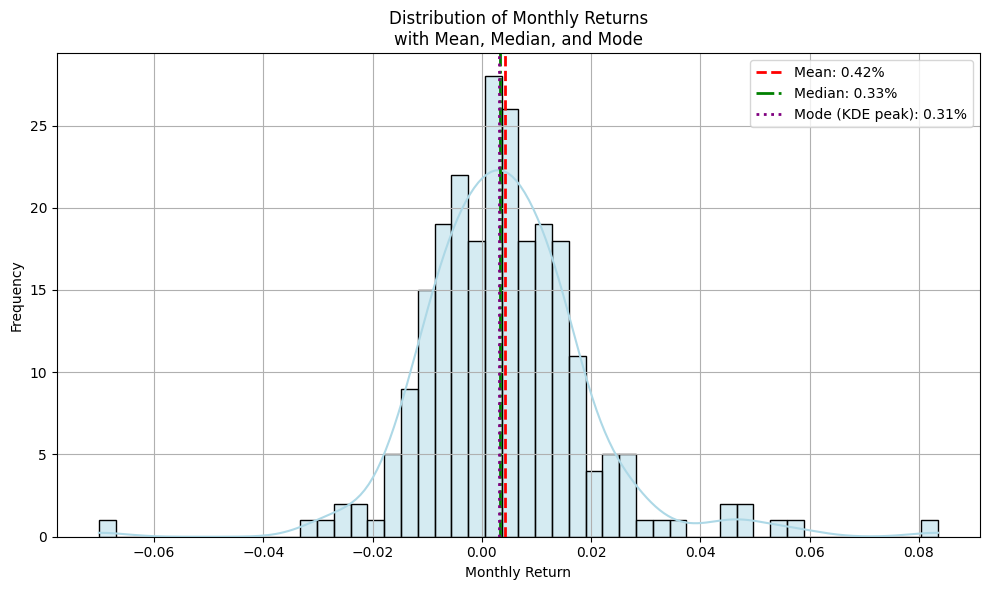

In [132]:
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde


returns_series = innovation_returns.dropna()

mean_val = returns_series.mean()
median_val = returns_series.median()

# Estimate KDE to find mode
kde = gaussian_kde(returns_series)
x_vals = np.linspace(returns_series.min(), returns_series.max(), 1000)
kde_vals = kde(x_vals)
mode_val = x_vals[np.argmax(kde_vals)]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(returns_series, bins=50, kde=True, color='lightblue', edgecolor='black')

# Add lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2%}')
plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2%}')
plt.axvline(mode_val, color='purple', linestyle=':', linewidth=2, label=f'Mode (KDE peak): {mode_val:.2%}')

# Title
plt.title('Distribution of Monthly Returns\nwith Mean, Median, and Mode')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

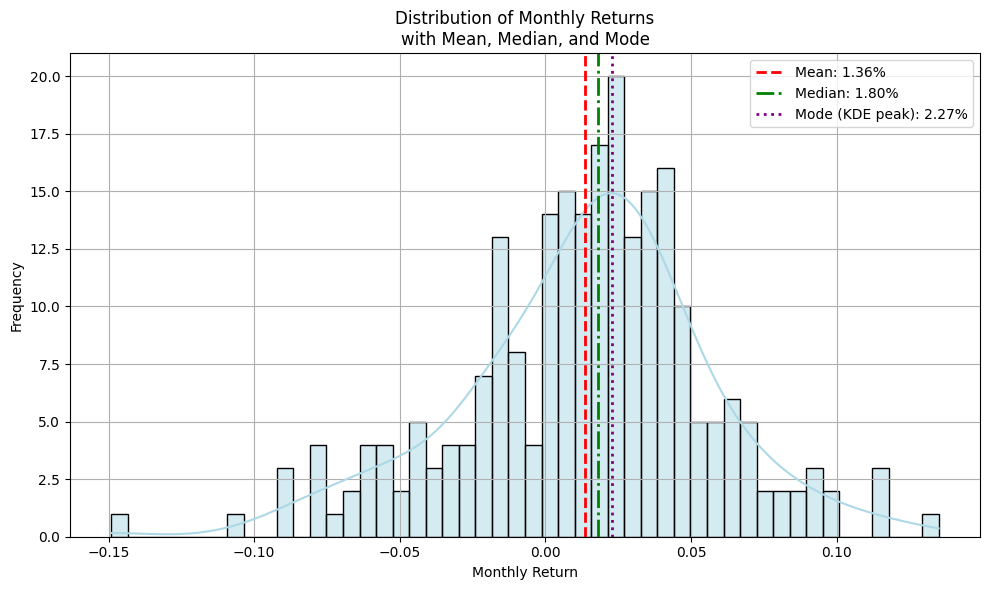

In [133]:
import seaborn as sns


returns_series = sp500_returns.dropna()

mean_val = returns_series.mean()
median_val = returns_series.median()

# Estimate KDE to find mode
kde = gaussian_kde(returns_series)
x_vals = np.linspace(returns_series.min(), returns_series.max(), 1000)
kde_vals = kde(x_vals)
mode_val = x_vals[np.argmax(kde_vals)]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(returns_series, bins=50, kde=True, color='lightblue', edgecolor='black')

# Add lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2%}')
plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2%}')
plt.axvline(mode_val, color='purple', linestyle=':', linewidth=2, label=f'Mode (KDE peak): {mode_val:.2%}')

# Title
plt.title('Distribution of Monthly Returns\nwith Mean, Median, and Mode')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

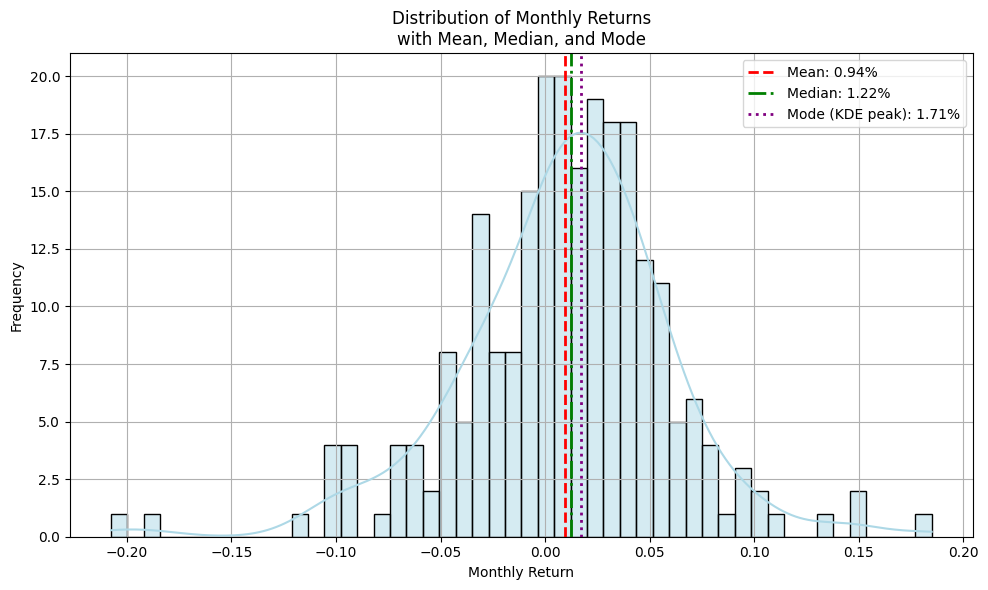

In [134]:
import seaborn as sns


returns_series = sp500_ew_returns.dropna()

mean_val = returns_series.mean()
median_val = returns_series.median()

# Estimate KDE to find mode
kde = gaussian_kde(returns_series)
x_vals = np.linspace(returns_series.min(), returns_series.max(), 1000)
kde_vals = kde(x_vals)
mode_val = x_vals[np.argmax(kde_vals)]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(returns_series, bins=50, kde=True, color='lightblue', edgecolor='black')

# Add lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2%}')
plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2%}')
plt.axvline(mode_val, color='purple', linestyle=':', linewidth=2, label=f'Mode (KDE peak): {mode_val:.2%}')

# Title
plt.title('Distribution of Monthly Returns\nwith Mean, Median, and Mode')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

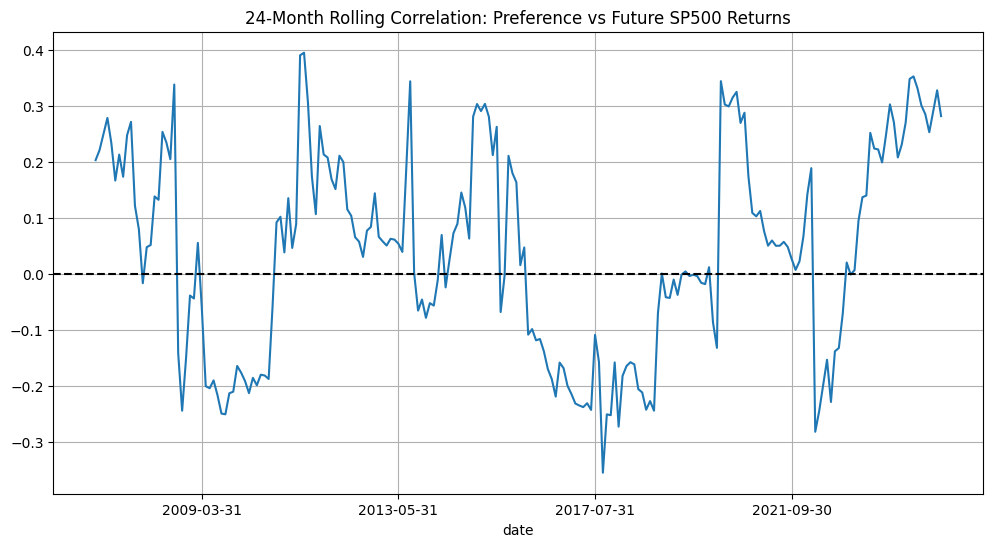

In [135]:
rolling_corr = innovation_returns.rolling(window=24).corr(sp500_returns.shift(-1))  # pref_ret vs next month SP500

rolling_corr.plot(figsize=(12,6), title='24-Month Rolling Correlation: Preference vs Future SP500 Returns')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()

In [136]:
import statsmodels.api as sm

X = innovation_returns.shift(1).dropna()
y = sp500_returns.loc[X.index]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3218
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.571
Time:                        10:58:20   Log-Likelihood:                 415.34
No. Observations:                 239   AIC:                            -826.7
Df Residuals:                     237   BIC:                            -819.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.003      4.645      0.0

In [137]:
rolling_mean = innovation_returns.rolling(window=12).mean().shift(1).dropna()
rolling_std = innovation_returns.rolling(window=12).std().shift(1).dropna()

# Build regression dataset
df_reg = pd.DataFrame({
    'future_sp500_ret': sp500_returns.shift(-1),
    'innovation_returns': innovation_returns,
    'pref_mean12': rolling_mean,
    'pref_vol12': rolling_std
}).dropna()

X = df_reg[["innovation_returns"]]
X = sm.add_constant(X)
y = df_reg['future_sp500_ret']

model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       future_sp500_ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2491
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.618
Time:                        10:58:20   Log-Likelihood:                 390.02
No. Observations:                 227   AIC:                            -776.0
Df Residuals:                     225   BIC:                            -769.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0134      0

In [138]:
model2_HAC = model2.get_robustcov_results(cov_type='HAC', maxlags=3)

# Print summary with robust SE
print(model2_HAC.summary())

                            OLS Regression Results                            
Dep. Variable:       future_sp500_ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1322
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.717
Time:                        10:58:20   Log-Likelihood:                 390.02
No. Observations:                 227   AIC:                            -776.0
Df Residuals:                     225   BIC:                            -769.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0134      0

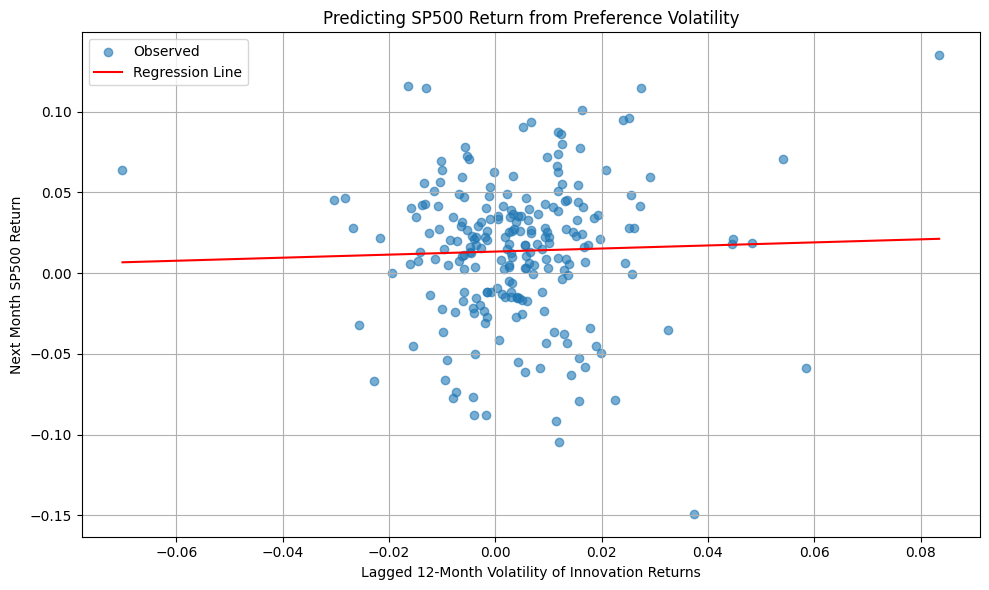

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Get fitted values from model
df_reg['fitted'] = model2.fittedvalues
df_reg['actual'] = y

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_reg['innovation_returns'], df_reg['actual'], alpha=0.6, label='Observed')

# Line of best fit
x_vals = np.linspace(df_reg['innovation_returns'].min(), df_reg['innovation_returns'].max(), 100)
y_vals = model2.params['const'] + model2.params['innovation_returns'] * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Labels and title
plt.xlabel('Lagged 12-Month Volatility of Innovation Returns')
plt.ylabel('Next Month SP500 Return')
plt.title('Predicting SP500 Return from Preference Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [141]:
# import matplotlib.pyplot as plt
# import numpy as np
#
# # Get fitted values and actuals
# df_reg['fitted'] = model2.fittedvalues
# df_reg['actual'] = y
#
# # Compute residuals
# df_reg['residual'] = df_reg['actual'] - df_reg['fitted']
# # Or if you prefer absolute distance
# df_reg['abs_residual'] = np.abs(df_reg['residual'])
#
# # Normalize residuals for coloring
# norm = plt.Normalize(df_reg['abs_residual'].min(), df_reg['abs_residual'].max())
#
# # Scatter plot with color based on how far from regression line (residual size)
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     df_reg['pref_vol12'],
#     df_reg['actual'],
#     c=df_reg['abs_residual'],  # Color by distance from regression line
#     cmap='coolwarm',
#     norm=norm,
#     alpha=0.6,
#     label='Observed'
# )
#
# # Line of best fit
# x_vals = np.linspace(df_reg['pref_vol12'].min(), df_reg['pref_vol12'].max(), 100)
# y_vals = model2.params['const'] + model2.params['pref_vol12'] * x_vals
# plt.plot(x_vals, y_vals, color='black', label='Regression Line')
#
# # Add color bar
# cbar = plt.colorbar(scatter)
# cbar.set_label('Distance from Regression Line (|Residual|)')
#
# # Labels and title
# plt.xlabel('Lagged 12-Month Volatility of Innovation Returns')
# plt.ylabel('Next Month SP500 Return')
# plt.title('Predicting SP500 Return from Preference Volatility\nColored by Distance from Regression Line')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [142]:
aapl = data["AAPL"]
aapl

date
2005-01-31    0.194099
2005-02-28    0.166710
2005-03-31   -0.071110
2005-04-29   -0.134629
2005-05-31    0.102587
                ...   
2024-08-30    0.032286
2024-09-30    0.017467
2024-10-31   -0.030429
2024-11-29    0.051658
2024-12-31    0.055155
Name: AAPL, Length: 240, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     3.010
Date:                Tue, 17 Jun 2025   Prob (F-statistic):             0.0918
Time:                        10:59:02   Log-Likelihood:                 43.714
No. Observations:                  36   AIC:                            -83.43
Df Residuals:                      34   BIC:                            -80.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.013      0.251      0.8

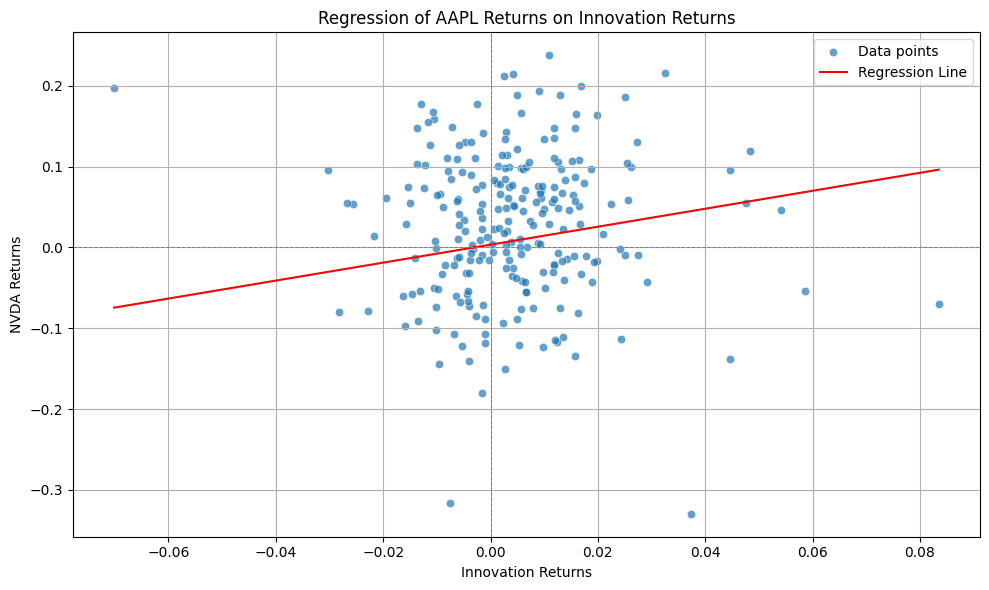

In [143]:
start_date = "2022-01-01"

X = innovation_returns[innovation_returns.index > start_date]
X = sm.add_constant(X)  # adds intercept term
y = aapl[aapl.index > start_date]

# Run regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=innovation_returns, y=aapl, label='Data points', alpha=0.7)

# Plot regression line
x_vals = pd.Series(sorted(innovation_returns))
y_pred = model.predict(sm.add_constant(x_vals))
plt.plot(x_vals, y_pred, color='red', label='Regression Line')

# Labels and styling
plt.title('Regression of AAPL Returns on Innovation Returns')
plt.xlabel('Innovation Returns')
plt.ylabel('NVDA Returns')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [147]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm

# Assumptions:
# - `data` is a DataFrame of monthly returns, columns = tickers, index = datetime
# - `innovation_returns` is a Series of monthly returns with same index
# - Returns are already log returns or % changes

window = 24  # 24 months
min_obs = 20  # Minimum required data points for a valid regression
results = []

# Loop through each ticker
for ticker in tqdm(data.columns):
    stock_returns = data[ticker]

    # Identify contiguous non-NaN blocks (i.e., when the stock was actively trading)
    is_not_nan = stock_returns.notna()
    blocks = (is_not_nan != is_not_nan.shift()).cumsum()

    for block_id in blocks[is_not_nan].unique():
        block_mask = blocks == block_id
        block_data = stock_returns[block_mask]

        # Only proceed if block is long enough for a rolling regression
        if len(block_data) < window:
            continue

        # Do rolling regression for this block
        for i in range(window, len(block_data) + 1):
            y = block_data.iloc[i - window:i]
            X = innovation_returns.loc[y.index]
            X.name = "innovation"

            x_cum_return = (1 + X).prod() - 1  # Or: np.cumprod(1 + X).iloc[-1] - 1
            y_cum_return = (1 + y).prod() - 1

            if y.isna().sum() > 0 or X.isna().sum() > 0:
                continue  # Skip if any NaNs in this window

            X_reg = sm.add_constant(X)
            model = sm.OLS(y, X_reg).fit()
            try:
                weight = innovation_weights.loc[y.index[-1], ticker]
            except KeyError:
                weight = np.nan

            result = {
                'date': y.index[-1],
                'ticker': ticker,
                'alpha': model.params['const'],
                'beta': model.params[X.name],
                'r2': model.rsquared,
                'pval_beta': model.pvalues[X.name],
                'tstat_beta': model.tvalues[X.name],
                'n_obs': int(model.nobs),
                'innovation_weight': weight,
                'x_cum_return': x_cum_return,
                'y_cum_return': y_cum_return
            }
            results.append(result)

# Convert to DataFrame
regression_df = pd.DataFrame(results)
regression_df = regression_df.set_index(['date', 'ticker']).sort_index()

# Preview
print(regression_df.head())
regression_df.to_csv("rolling_regression_results.csv")

100%|██████████| 936/936 [01:33<00:00, 10.06it/s]


                      alpha      beta        r2  pval_beta  tstat_beta  n_obs  \
date       ticker                                                               
2006-12-29 A       0.027711 -4.034397  0.148682   0.062761   -1.960177     24   
           AAPL    0.046346  0.470471  0.001412   0.861603    0.176388     24   
           ABI     0.024660  0.830887  0.016000   0.555884    0.598095     24   
           ABK     0.007671 -1.817985  0.120874   0.095972   -1.739214     24   
           ABT     0.002224  1.963625  0.124928   0.090207    1.772229     24   

                   innovation_weight  x_cum_return  y_cum_return  
date       ticker                                                 
2006-12-29 A               -0.000911      0.033918      0.533310  
           AAPL             0.003601      0.033918      1.634783  
           ABI             -0.001484      0.033918      0.777719  
           ABK             -0.001275      0.033918      0.101460  
           ABT              0.

In [155]:
aapl_df = regression_df.xs('AAPL', level='ticker')
aapl_df

,alpha,beta,r2,pval_beta,tstat_beta,n_obs,innovation_weight,x_cum_return,y_cum_return
date,,,,,,,,,
2006-12-29,0.046346,0.470471,0.001412,0.861603,0.176388,24,0.003601,0.033918,1.634783
2007-01-31,0.039418,-0.063129,0.000027,0.980655,-0.024525,24,0.003590,0.018507,1.229649
2007-02-28,0.031876,-0.047351,0.000018,0.984322,-0.019875,24,0.003655,-0.001460,0.886091
2007-03-30,0.038914,0.045303,0.000017,0.984658,0.019449,24,0.004177,0.005754,1.229662
2007-04-30,0.048022,1.685153,0.024077,0.469075,0.736723,24,0.004376,-0.006501,1.767609
...,...,...,...,...,...,...,...,...,...
2024-08-30,0.012121,0.701827,0.037991,0.361400,0.932104,24,0.068529,0.255764,0.472261
2024-09-30,0.018560,0.640516,0.037612,0.363856,0.927256,24,0.067700,0.252362,0.704138
2024-10-31,0.010660,0.793826,0.058934,0.253036,1.173775,24,0.066264,0.274890,0.489146


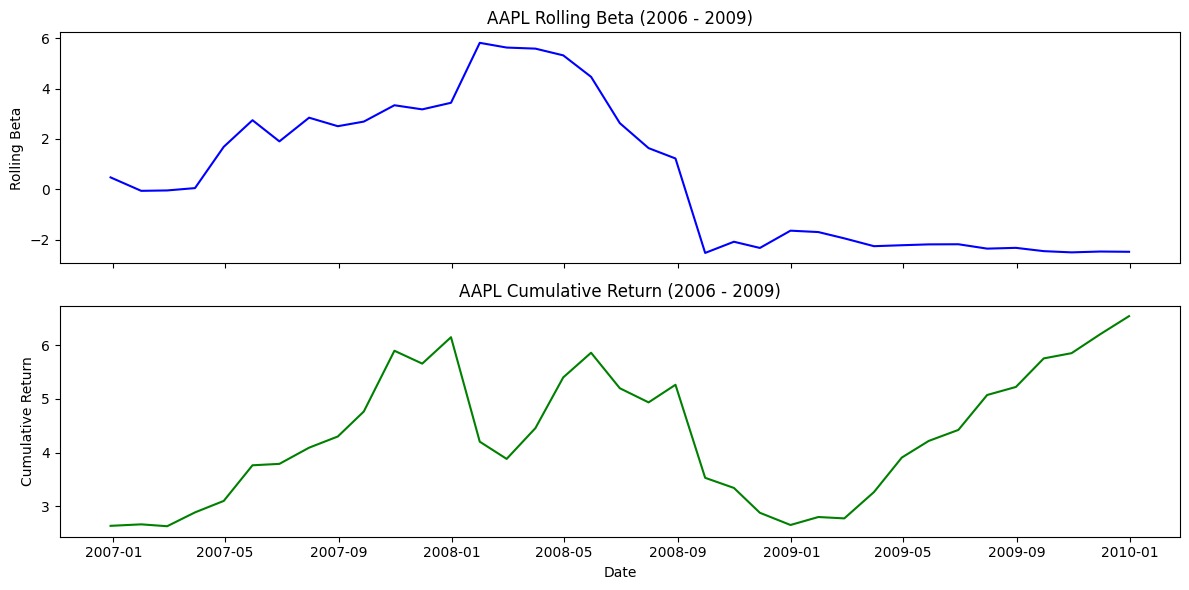

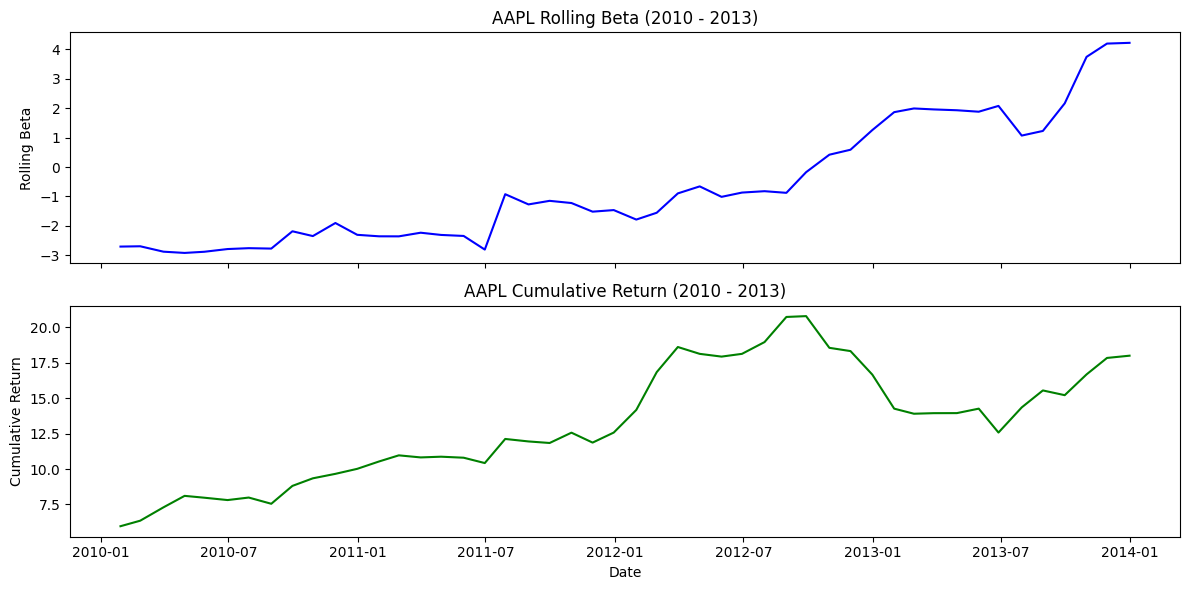

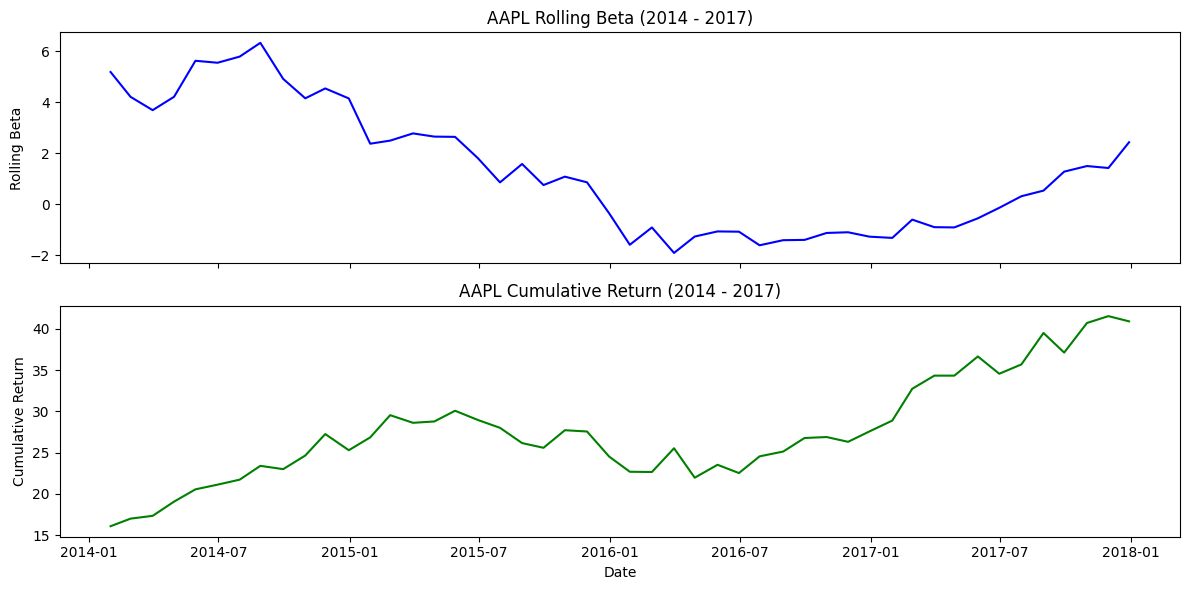

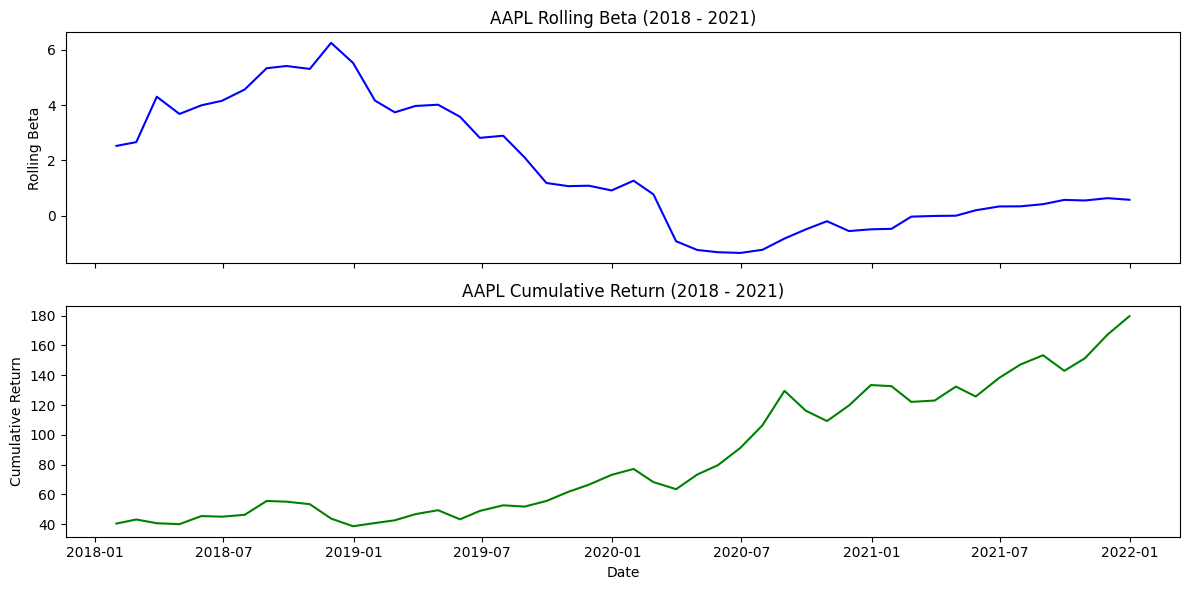

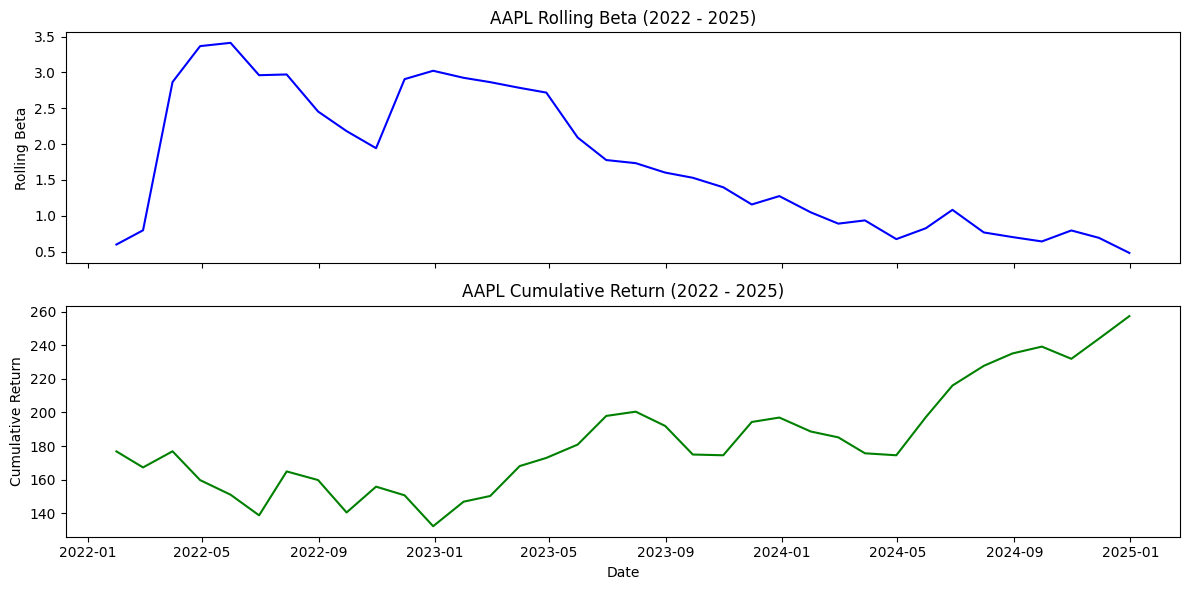

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
aapl_returns = data['AAPL'].dropna()
aapl_cum_return = (1 + aapl_returns).cumprod()

# Assume aapl_df has 'beta' and datetime index; aapl_returns is a Series with datetime index

# Align indices
common_index = aapl_df.index.intersection(aapl_cum_return.index)
aapl_df = aapl_df.loc[common_index]
aapl_cum_return = aapl_cum_return.loc[common_index]

# Convert indices to datetime if not already
aapl_df.index = pd.to_datetime(aapl_df.index)
aapl_cum_return.index = pd.to_datetime(aapl_cum_return.index)

# Define function to split into 4-year periods
def split_into_periods(df, period_years=4):
    periods = []
    start_year = df.index[0].year
    end_year = df.index[-1].year

    for start in range(start_year, end_year + 1, period_years):
        end = start + period_years - 1
        mask = (df.index.year >= start) & (df.index.year <= end)
        periods.append((start, end, df.loc[mask]))
    return periods

# Split dataframes into 4-year periods
beta_periods = split_into_periods(aapl_df[['beta']])
cumret_periods = split_into_periods(aapl_cum_return.to_frame(name='cum_return'))

# Plot each period separately
for (start_b, end_b, beta_data), (start_c, end_c, cumret_data) in zip(beta_periods, cumret_periods):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)

    ax1.plot(beta_data.index, beta_data['beta'], label='Rolling Beta', color='blue')
    ax1.set_ylabel('Rolling Beta')
    ax1.set_title(f'AAPL Rolling Beta ({start_b} - {end_b})')

    ax2.plot(cumret_data.index, cumret_data['cum_return'], label='Cumulative Return', color='green')
    ax2.set_ylabel('Cumulative Return')
    ax2.set_title(f'AAPL Cumulative Return ({start_c} - {end_c})')
    ax2.set_xlabel('Date')

    plt.tight_layout()
    plt.show()




/var/folders/rd/6pjhbndj3_xbc_vx64hj0zh00000gn/T/ipykernel_29655/428313086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['forward_return'] = aapl_returns.shift(-1).reindex(aapl_df.index).values


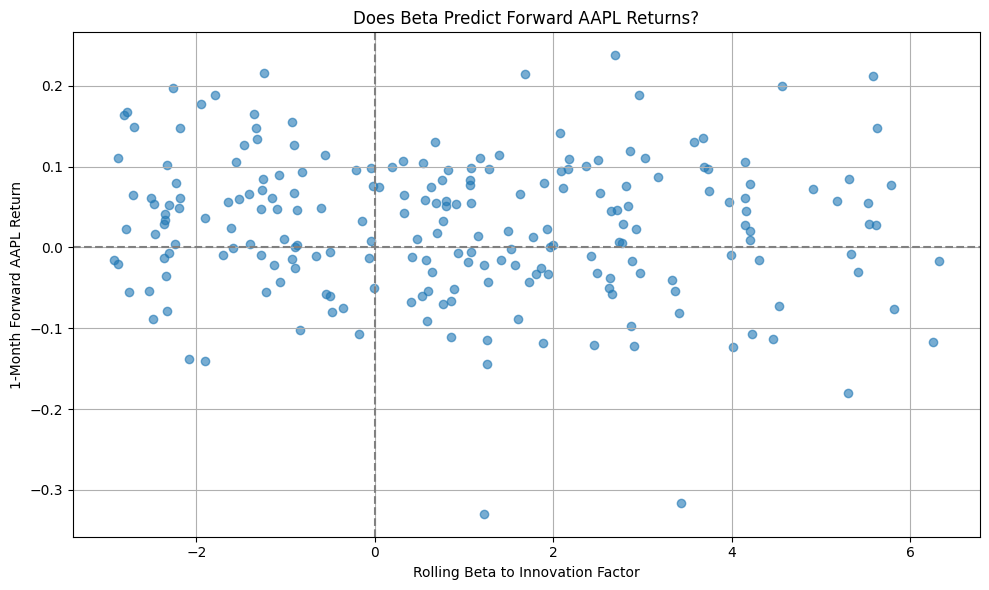

In [153]:
# Get the raw return series
aapl_returns = data["AAPL"]

# Match the forward returns (e.g., 1-month ahead return)
aapl_df['forward_return'] = aapl_returns.shift(-1).reindex(aapl_df.index).values

plt.figure(figsize=(10, 6))
plt.scatter(aapl_df['beta'], aapl_df['forward_return'], alpha=0.6)
plt.xlabel('Rolling Beta to Innovation Factor')
plt.ylabel('1-Month Forward AAPL Return')
plt.title('Does Beta Predict Forward AAPL Returns?')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/rd/6pjhbndj3_xbc_vx64hj0zh00000gn/T/ipykernel_29655/1326560183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['predicted'] = aapl_df['alpha'] + aapl_df['beta'] * aapl_df['x_cum_return']
/var/folders/rd/6pjhbndj3_xbc_vx64hj0zh00000gn/T/ipykernel_29655/1326560183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['rolling_corr'] = aapl_df['predicted'].rolling(12).corr(aapl_df['forward_return'])


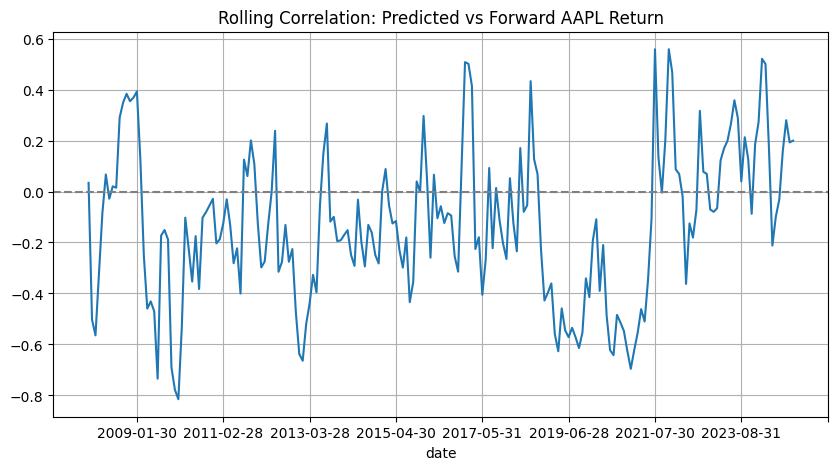

In [154]:
aapl_df['predicted'] = aapl_df['alpha'] + aapl_df['beta'] * aapl_df['x_cum_return']
aapl_df['rolling_corr'] = aapl_df['predicted'].rolling(12).corr(aapl_df['forward_return'])

aapl_df['rolling_corr'].plot(figsize=(10, 5), title='Rolling Correlation: Predicted vs Forward AAPL Return')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()
